In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [2]:
InputPath = ""
X = pickle.load(open(InputPath+"X.pickle","rb"))
y = pickle.load(open(InputPath+"y.pickle","rb"))

In [3]:
X = X/255.0
print(X.shape[1:])
print(y.shape[1:])

(50, 50, 3)
(1,)


In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

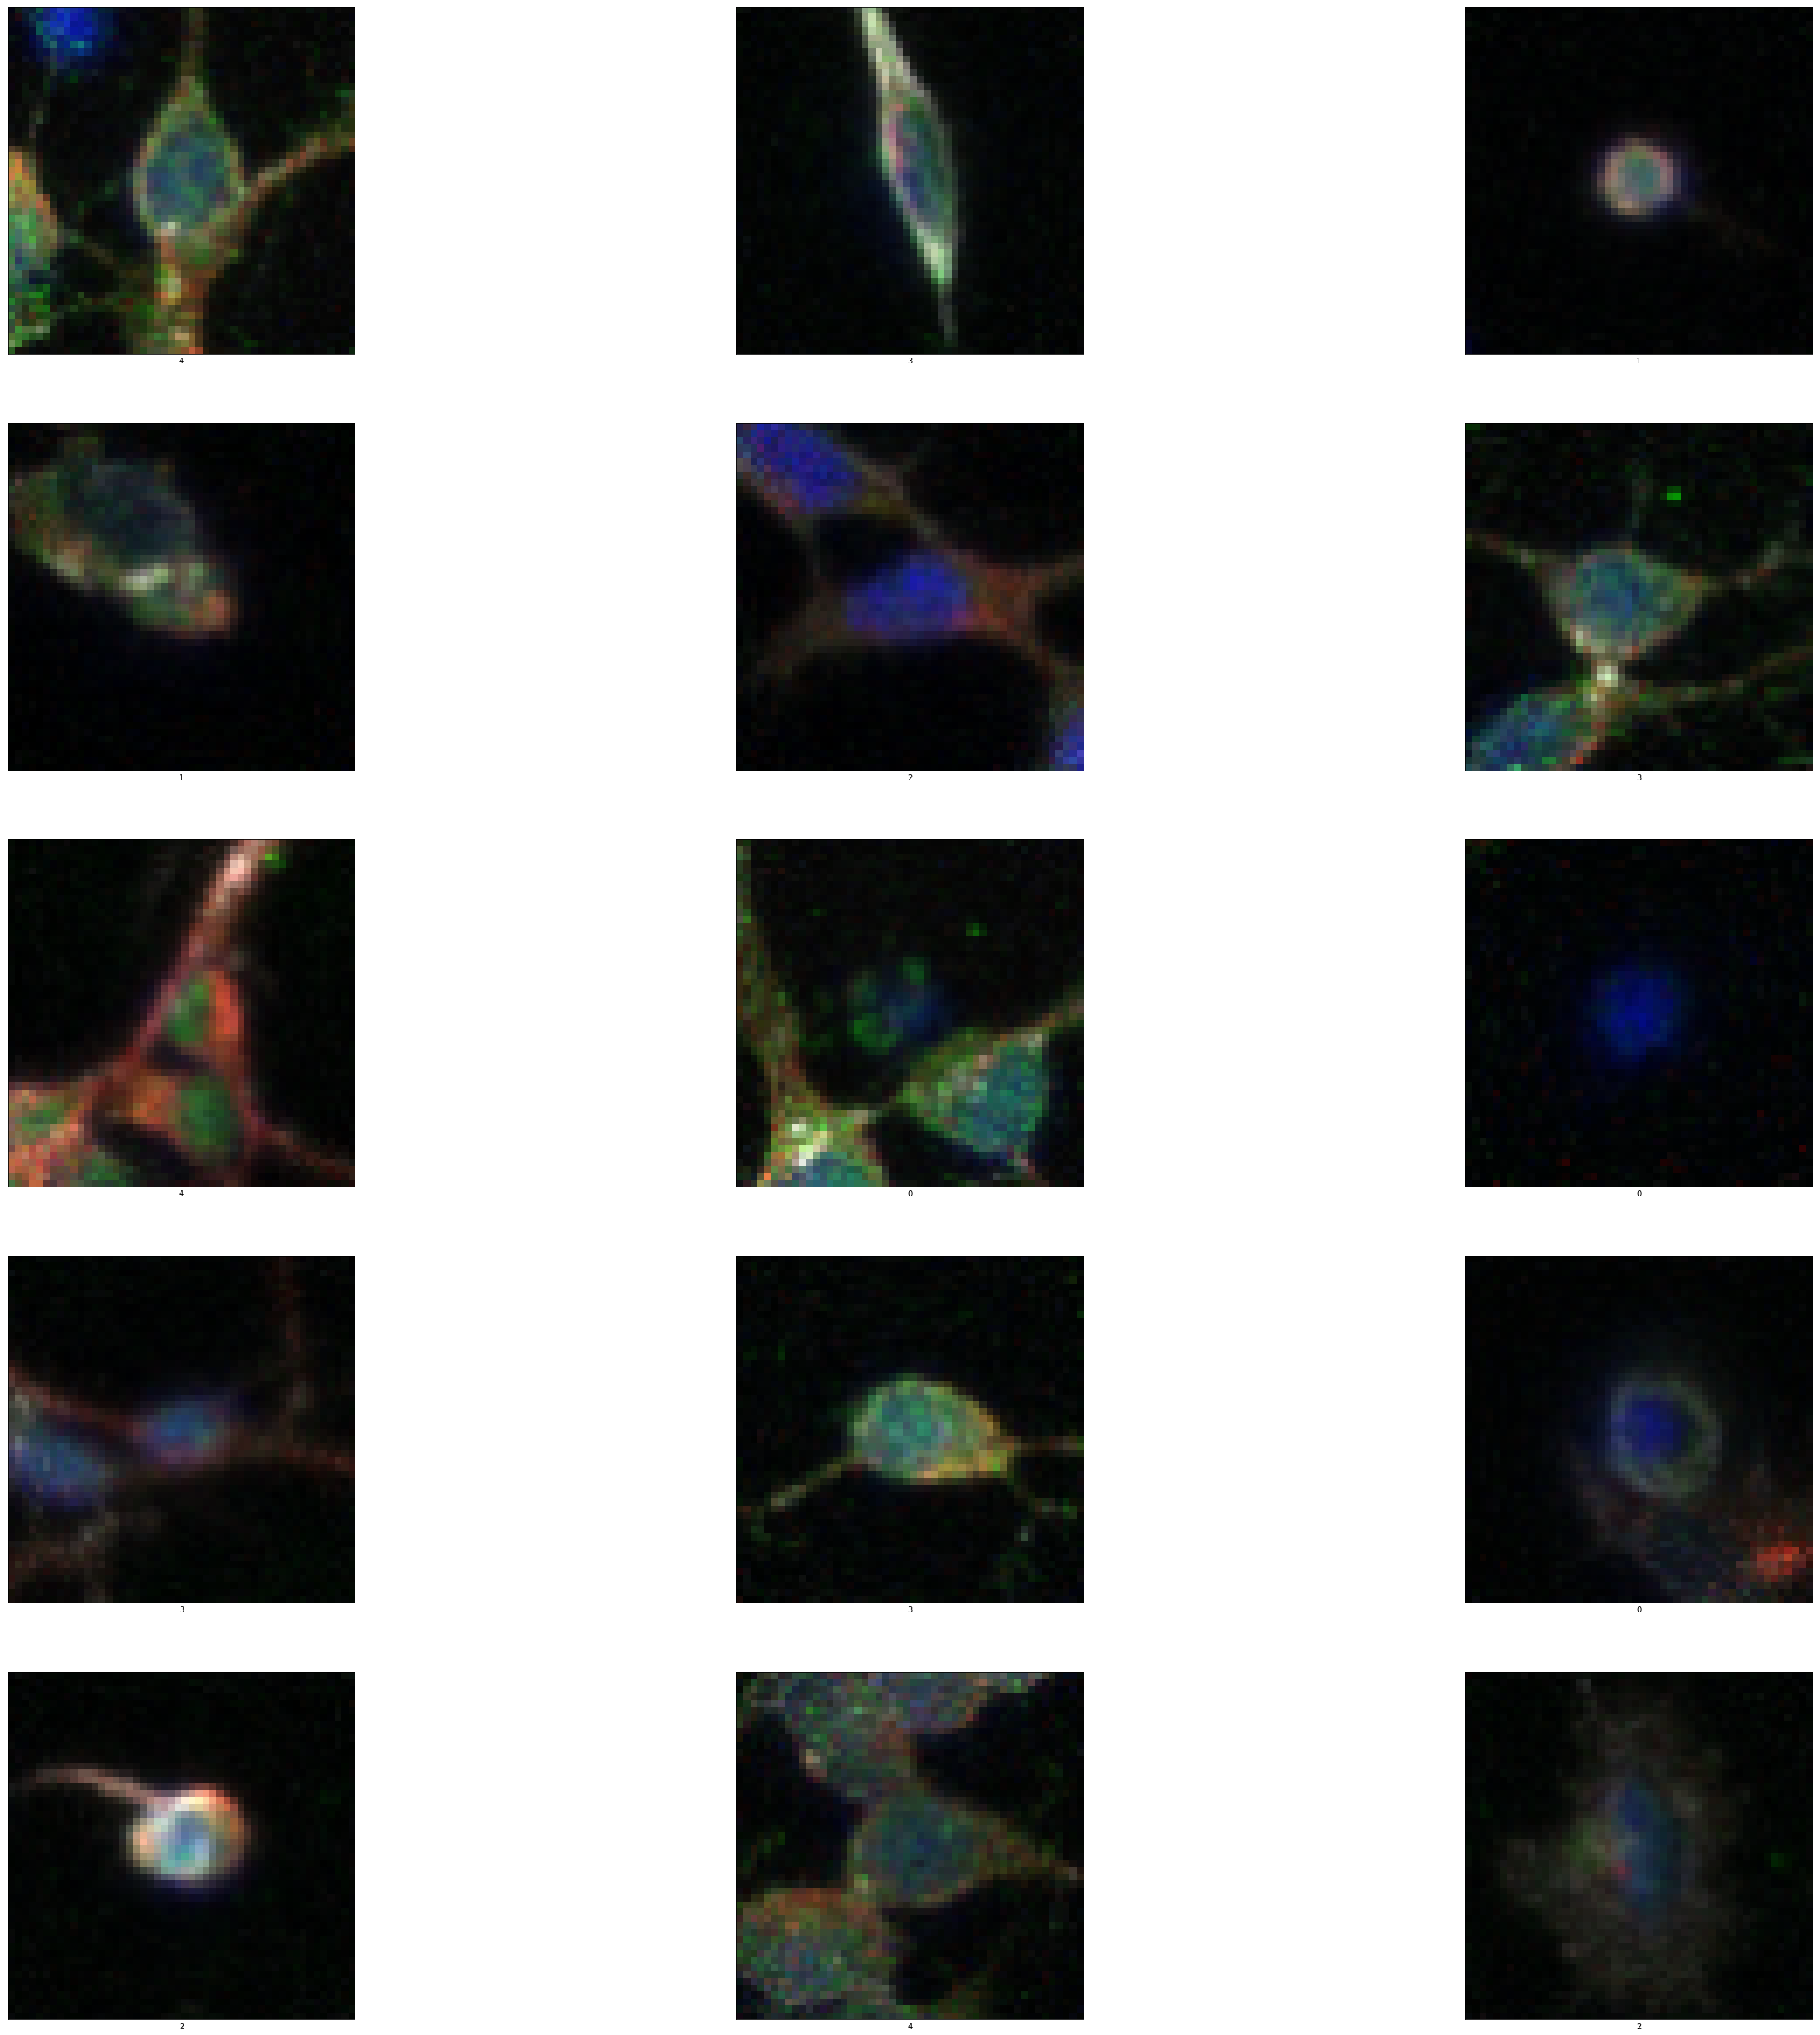

In [5]:
plt.figure(figsize=(50,50))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_y[i][0]))
plt.show()

In [6]:
import time
NAME = "Cnn64x2-{}-fix_X_withActivation".format(int(time.time()))

In [7]:
# gpu_option = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [8]:
weights = [175, 290, 326, 220, 576]
total = sum(weights)
weights[:] = [x / total for x in weights]
print(weights)

[0.11027095148078135, 0.18273471959672338, 0.20541902961562697, 0.13862633900441085, 0.3629489603024575]


In [9]:
classWeights = { i : weights[i] for i in range(0, len(weights) ) }
classWeights

{0: 0.11027095148078135,
 1: 0.18273471959672338,
 2: 0.20541902961562697,
 3: 0.13862633900441085,
 4: 0.3629489603024575}

In [10]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(50,50,3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3),activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128,(3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
#     print(model.summary())
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256,(3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

model = VGG_16()
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 52, 52, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       7

In [13]:
# history = model.fit(X,y,batch_size=32, epochs = 10, validation_split=0.3, callbacks = [tensorboard])
# class_weight=classWeights,
history = model.fit(train_X, train_y, epochs=30, 
                    validation_data=(test_X, test_y),verbose=0)

In [14]:

# plt.plot(history.history['accuracy'], label='acc')
# plt.plot(history.history['val_accuracy'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.0, 1])
# plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

175/1 - 4s - loss: 1.6162


TypeError: 'numpy.float64' object is not iterable

In [ ]:
ut = model.predict(test_X)

In [ ]:
ut

In [ ]:
predicted

In [ ]:
classWeights = [ ut[i]-test_ for i in range(0, len(ut) ) ]
